In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# extracted from chat-gpt

linkage_methods = [
    'ward',             # Ward Linkage
    'single',           # Single Linkage (Minimum Linkage)
    'complete',         # Complete Linkage (Maximum Linkage)
    'average',          # Average Linkage
    'centroid',         # Centroid Linkage
    'median',           # Median Linkage
    'weighted',         # Weighted Linkage
    'ward',             # Ward's Minimum Variance Linkage
    'mcquitty',         # McQuitty Linkage
    'median_w',         # Median Weighted Linkage
]

distance_metrics = [
    'euclidean',        # Euclidean Distance
    'cityblock',        # Manhattan Distance (City Block Distance)
    'chebyshev',        # Maximum (Chebyshev) Distance
    'minkowski',        # Minkowski Distance
    'mahalanobis',      # Mahalanobis Distance
    'correlation',      # Pearson Correlation Distance
    'spearman',         # Spearman Correlation Distance
    'kendall',          # Kendall Tau Distance
    'canberra',         # Canberra Distance
    'braycurtis',       # Bray-Curtis Distance
    'cosine',           # Cosine Distance
    'jaccard',          # Jaccard Distance (for binary data)
    'hamming',          # Hamming Distance (for binary data)
]


In [3]:
class HierarchicalClustering:
    
    def __init__(self,X):
        self.linkage_type = None
        self.linkage_metric = None
        self.linkage_matrix = None
        self.data = X
        
    def linkages(self,X,linkage_type,linkage_metric):
        if(linkage_type=='ward' and linkage_metric!='euclidean'):
            print('Method Ward works only with metric euclidean')
            return
            
        self.linkage_type = linkage_type
        self.linkage_metric = linkage_metric
        self.data = X
        self.linkage_matrix = linkage(self.data,method=self.linkage_type,metric=self.linkage_metric)
        return self.linkage_matrix
    
    def plot_dendrogram(self,linkage_matrix):
        plt.figure(figsize=(15,4))
        dendrogram(linkage_matrix)
        plt.show()
        

In [61]:
# sample case for costumers dataset
loc = './SMAI-Dataset-hc-dataset/new_customers.csv'
df = pd.read_csv(loc)
gender_mapping = {'Male': 0, 'Female': 1}
df['Genre'] = df['Genre'].map(gender_mapping)

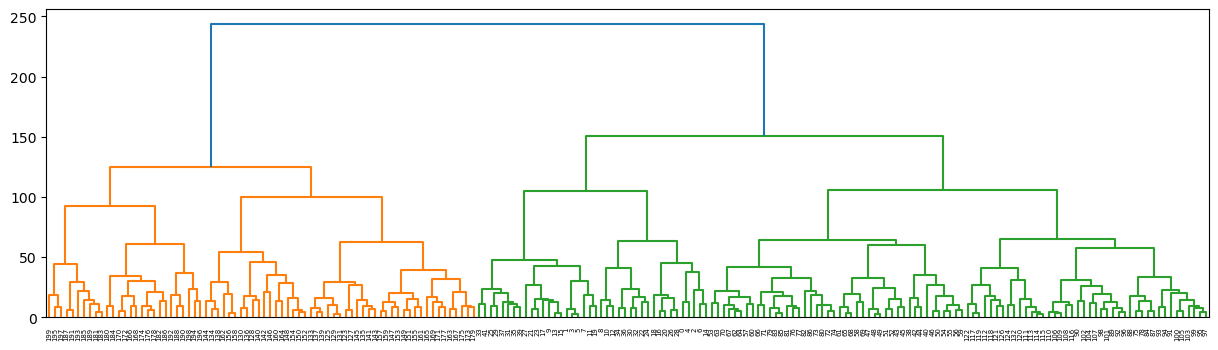

In [62]:
method = 'complete'
metric = 'euclidean'
hc = HierarchicalClustering(df)
lm = hc.linkages(df,method,metric)
# print('linkage matrix : ',lm)
hc.plot_dendrogram(lm)

method :  ward | metric =  euclidean | num_features =  5


/home/tejas/anaconda3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:2843: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


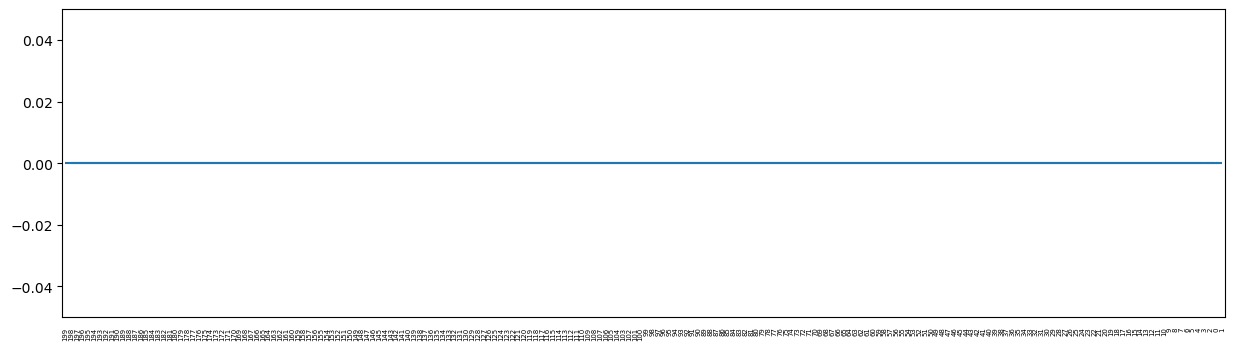

method :  ward | metric =  euclidean | num_features =  4


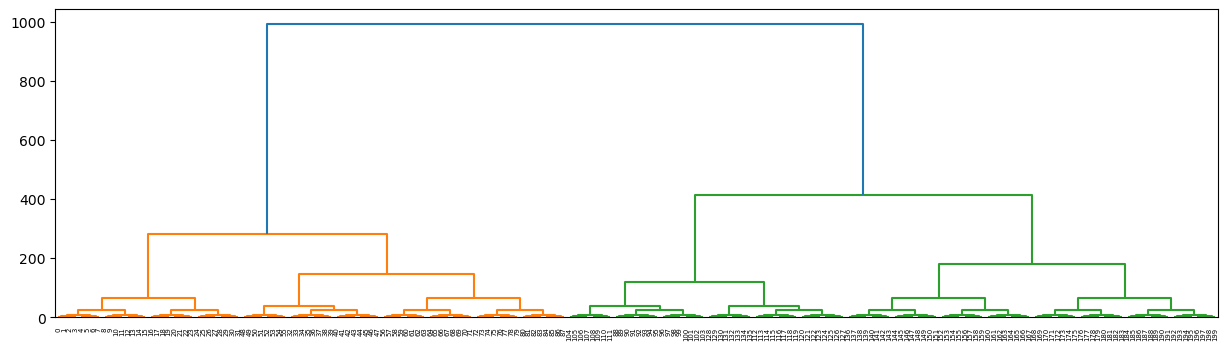

method :  ward | metric =  euclidean | num_features =  3


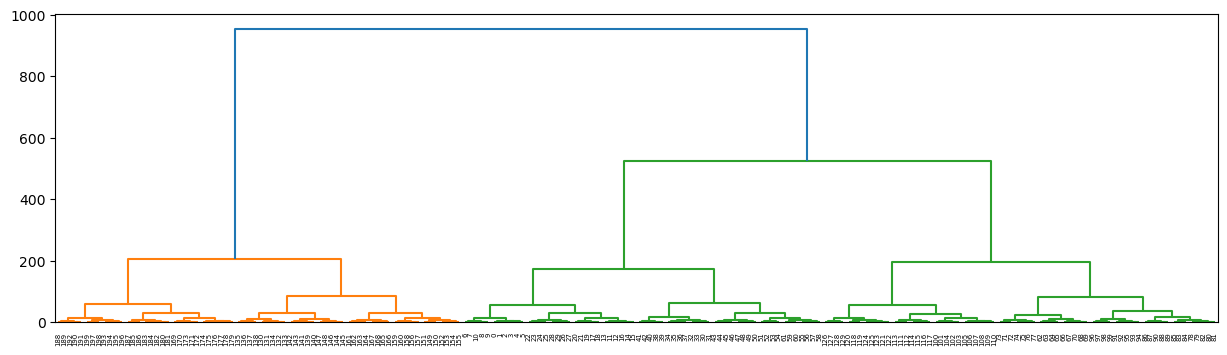

method :  ward | metric =  euclidean | num_features =  2


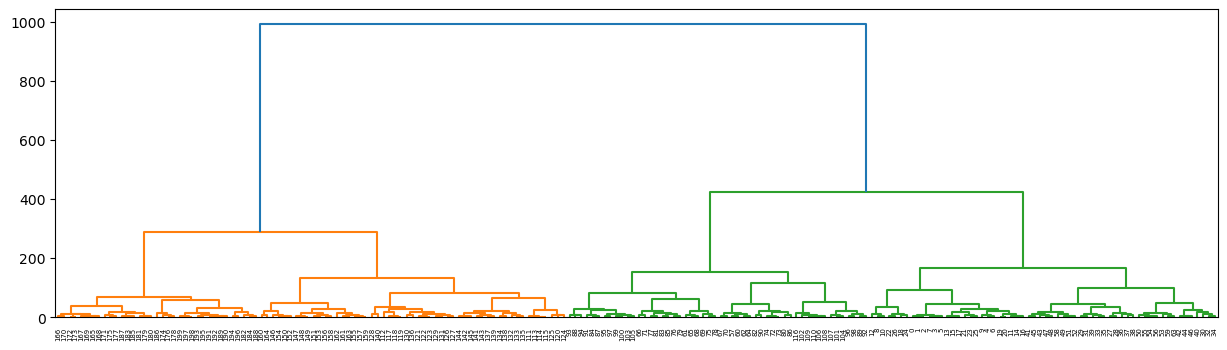

method :  single | metric =  euclidean | num_features =  5


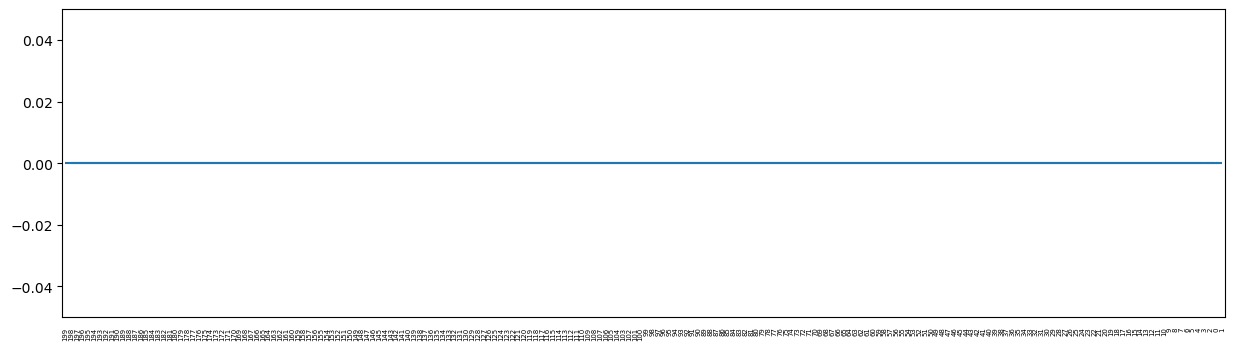

method :  single | metric =  euclidean | num_features =  4


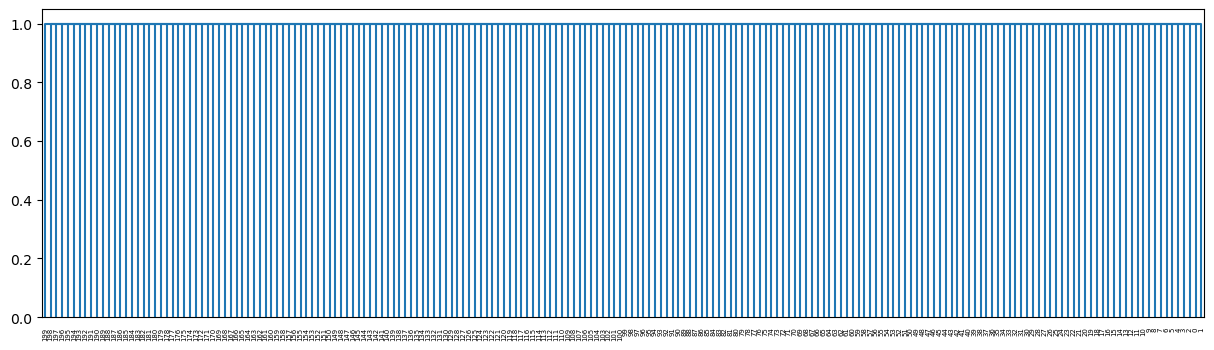

method :  single | metric =  euclidean | num_features =  3


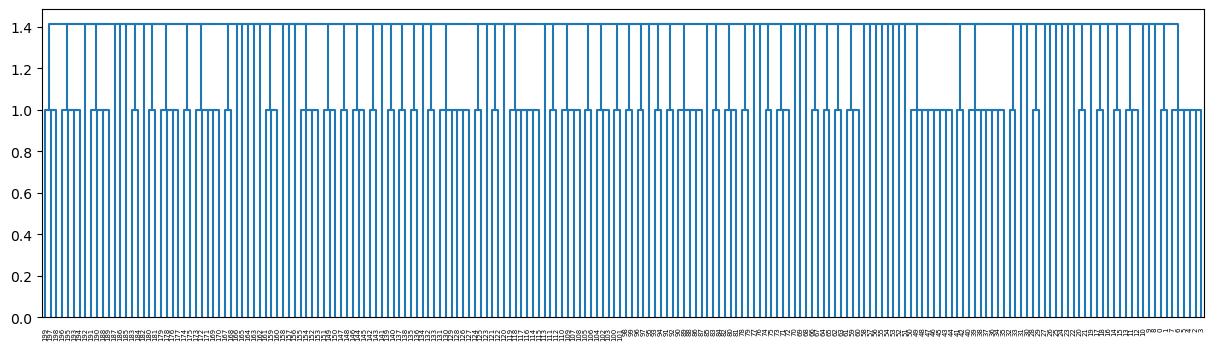

method :  single | metric =  euclidean | num_features =  2


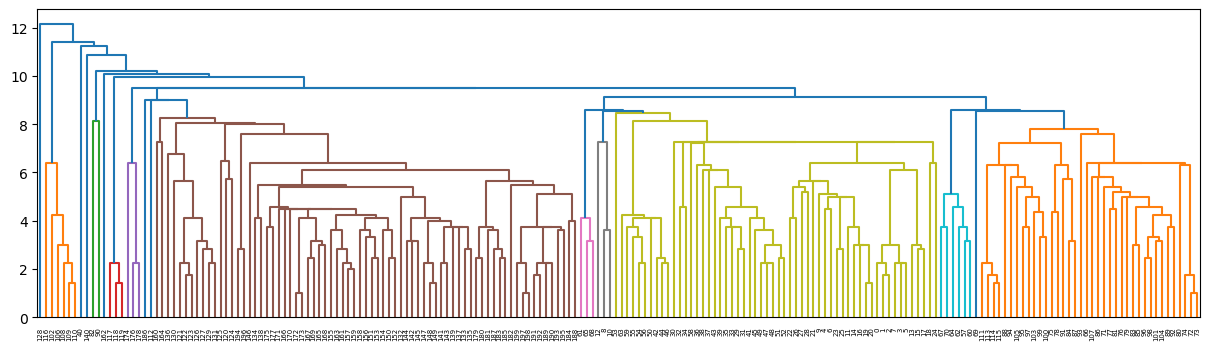

method :  single | metric =  cityblock | num_features =  5


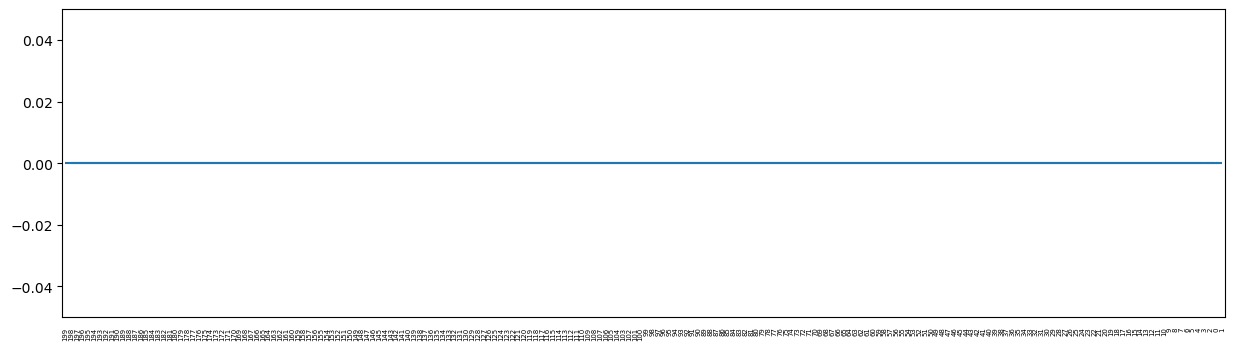

method :  single | metric =  cityblock | num_features =  4


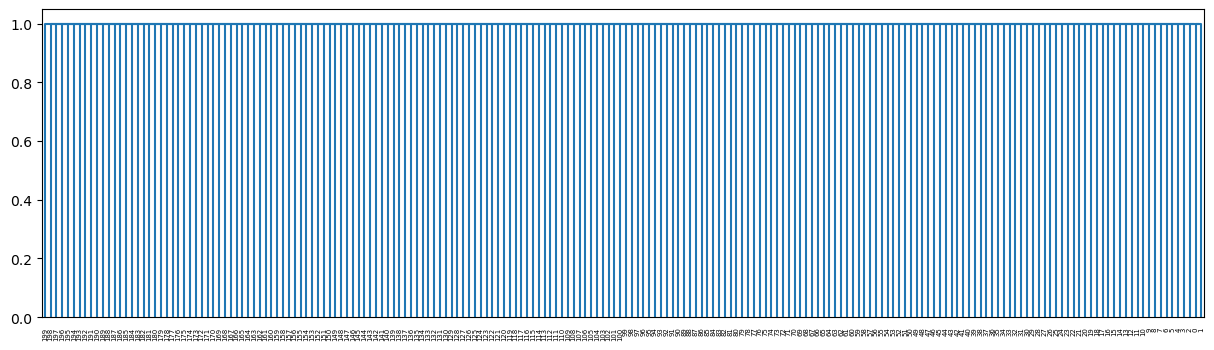

method :  single | metric =  cityblock | num_features =  3


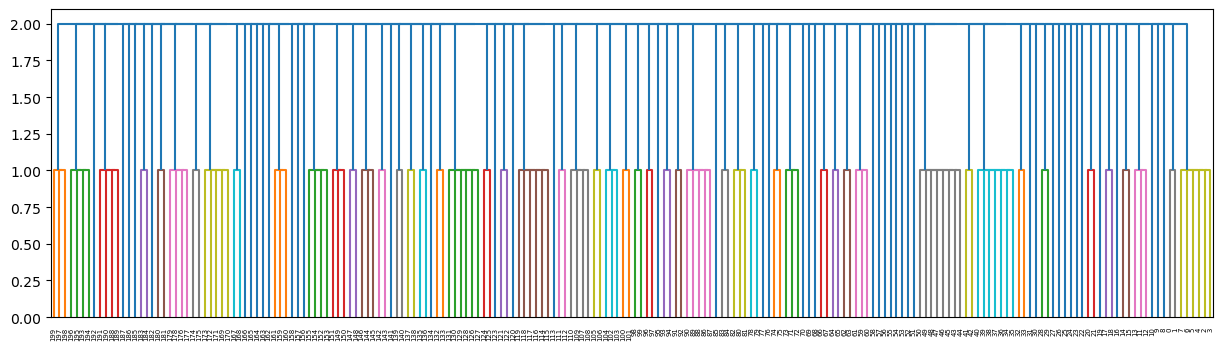

method :  single | metric =  cityblock | num_features =  2


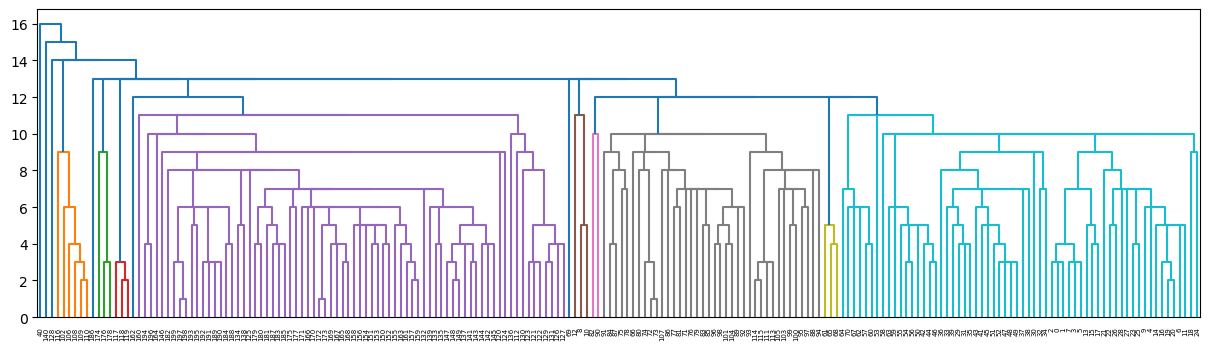

method :  single | metric =  chebyshev | num_features =  5


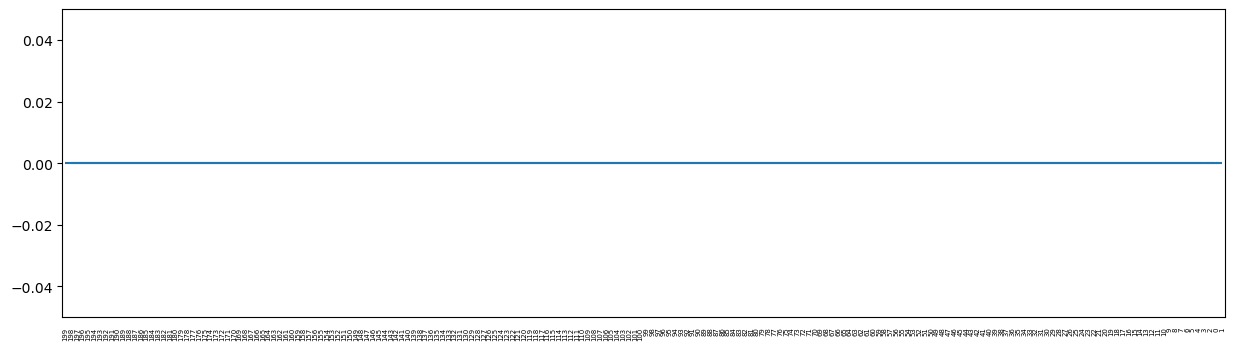

method :  single | metric =  chebyshev | num_features =  4


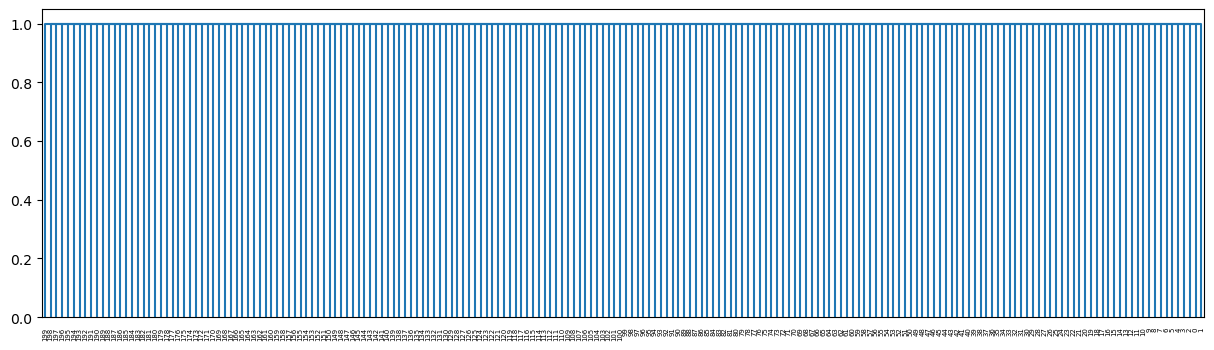

method :  single | metric =  chebyshev | num_features =  3


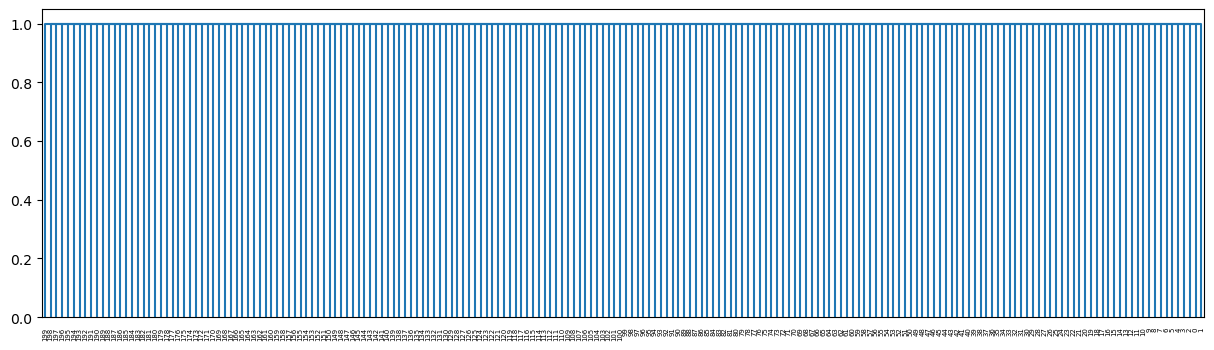

method :  single | metric =  chebyshev | num_features =  2


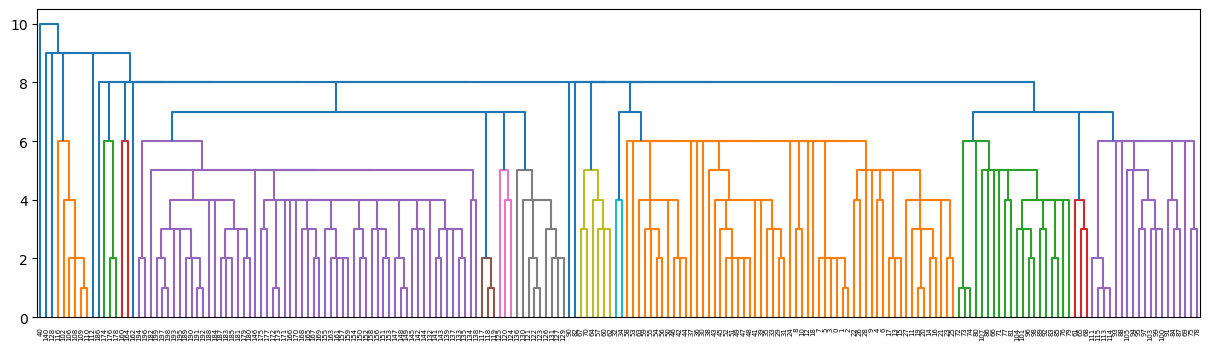

method :  complete | metric =  euclidean | num_features =  5


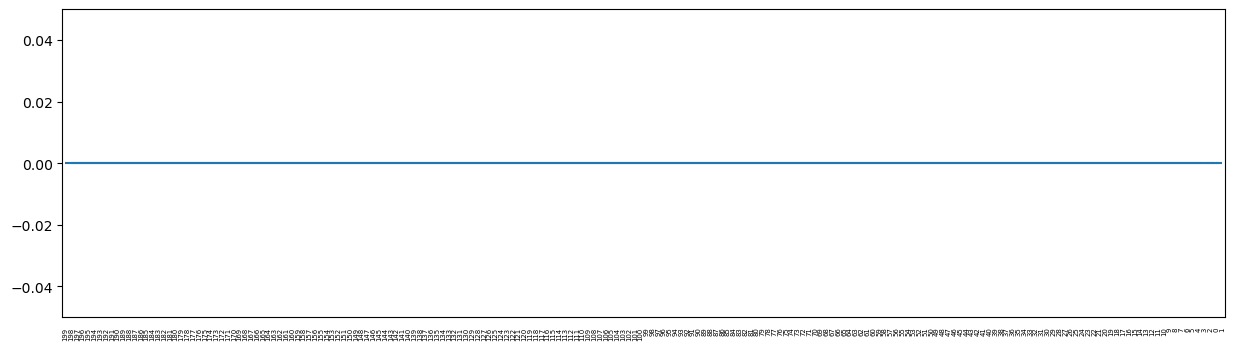

method :  complete | metric =  euclidean | num_features =  4


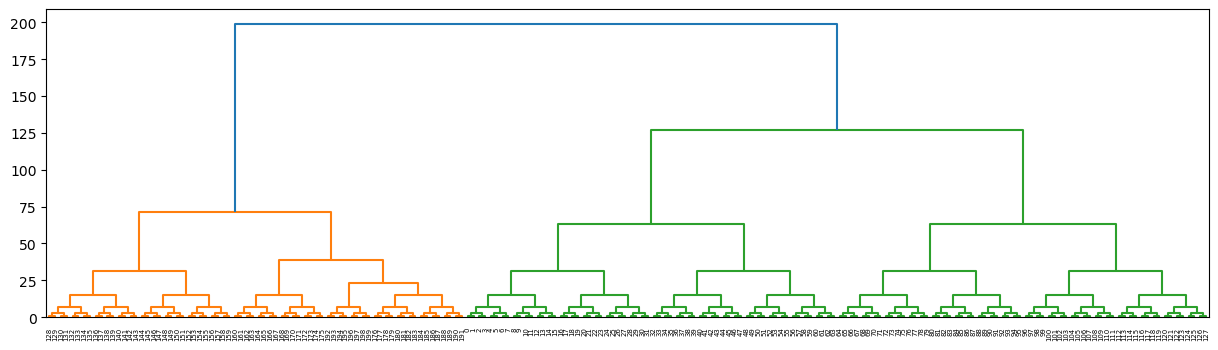

method :  complete | metric =  euclidean | num_features =  3


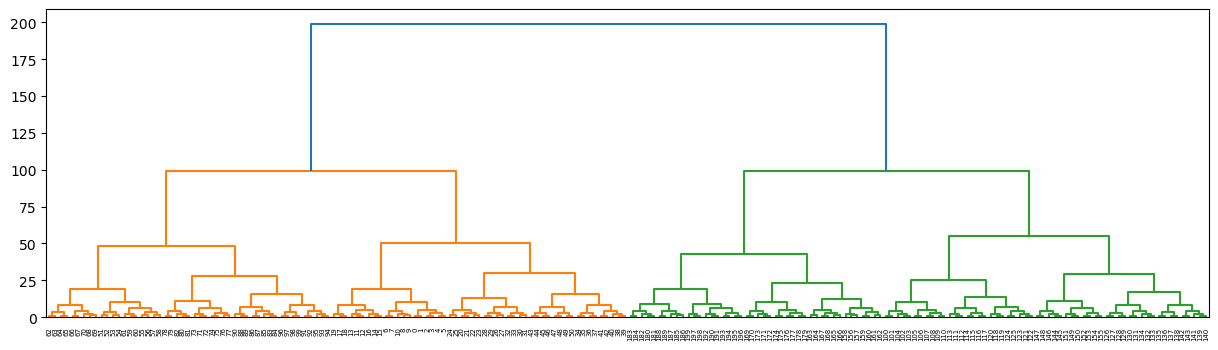

method :  complete | metric =  euclidean | num_features =  2


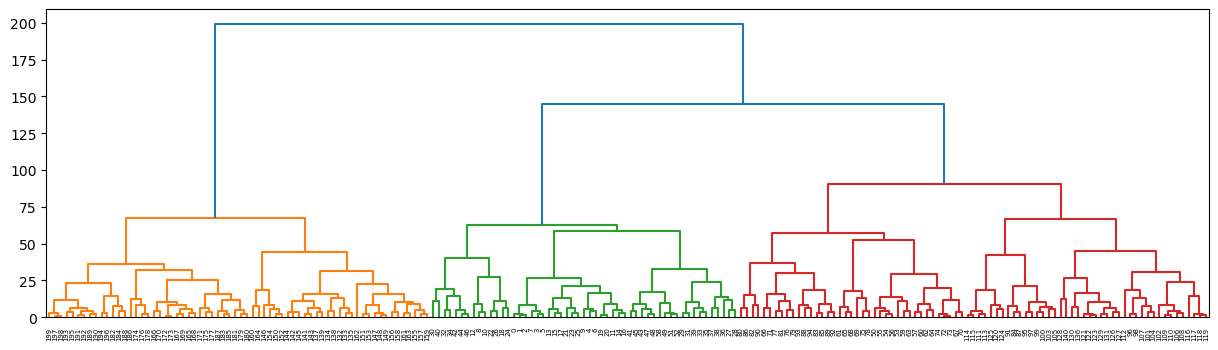

method :  complete | metric =  cityblock | num_features =  5


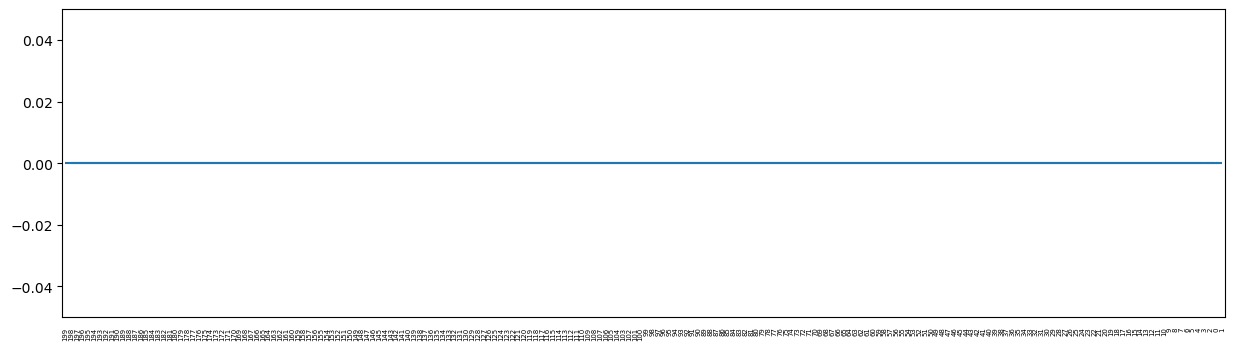

method :  complete | metric =  cityblock | num_features =  4


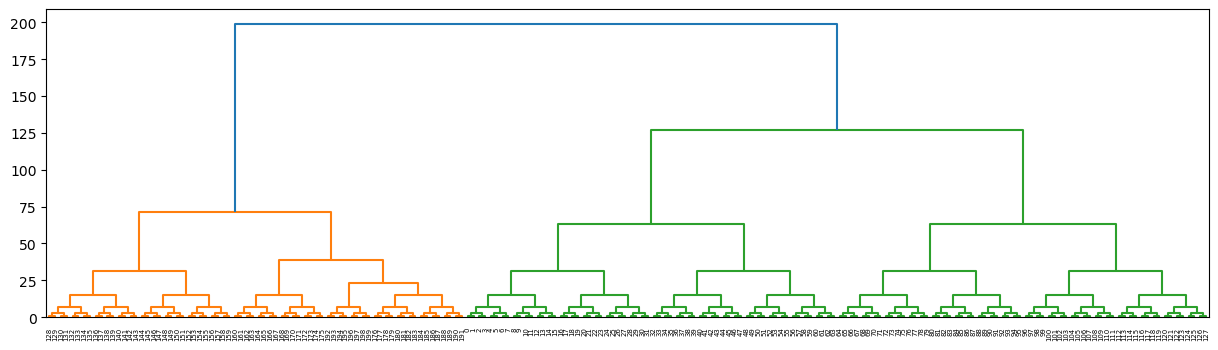

method :  complete | metric =  cityblock | num_features =  3


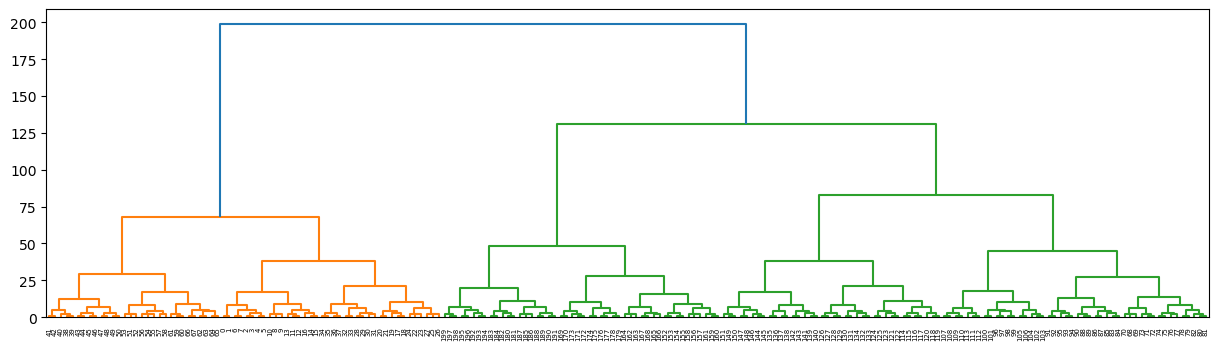

method :  complete | metric =  cityblock | num_features =  2


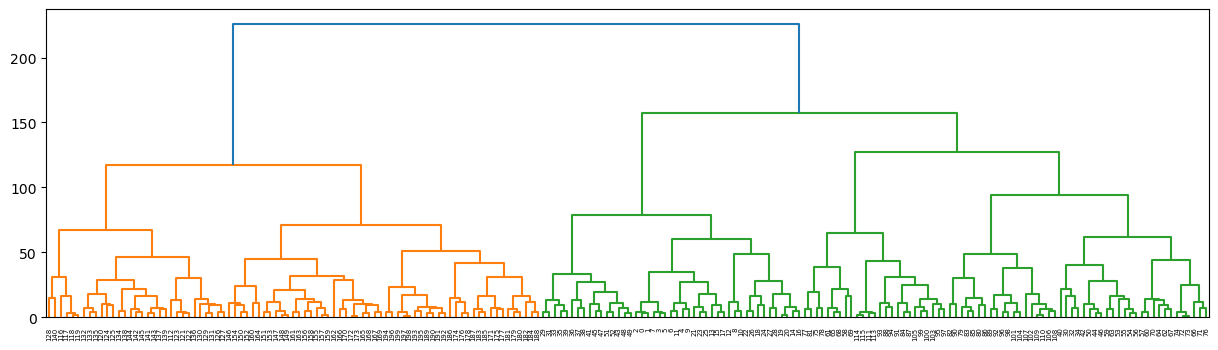

method :  complete | metric =  chebyshev | num_features =  5


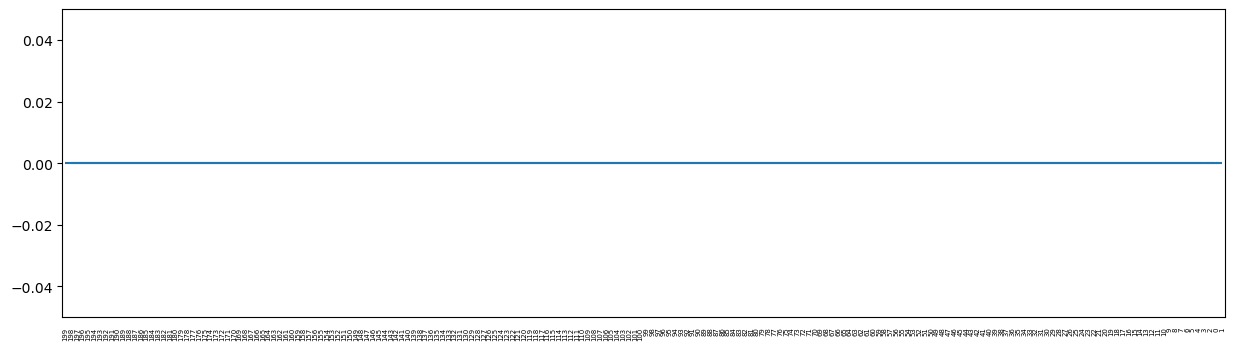

method :  complete | metric =  chebyshev | num_features =  4


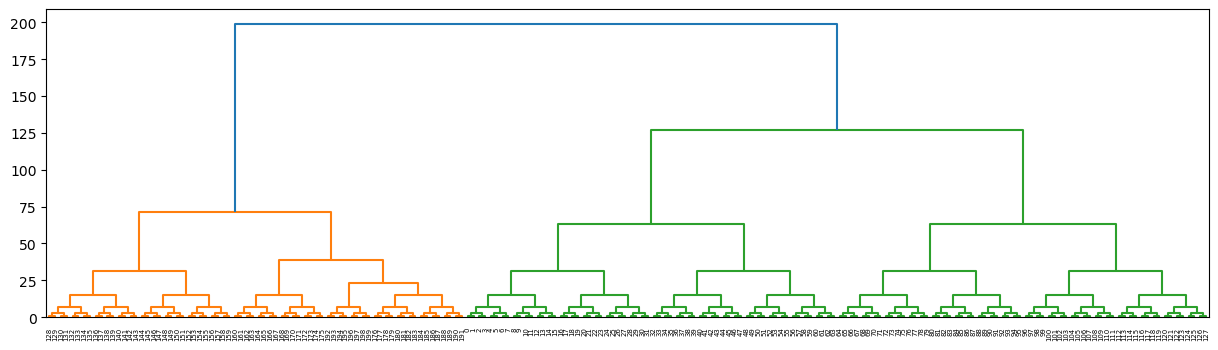

method :  complete | metric =  chebyshev | num_features =  3


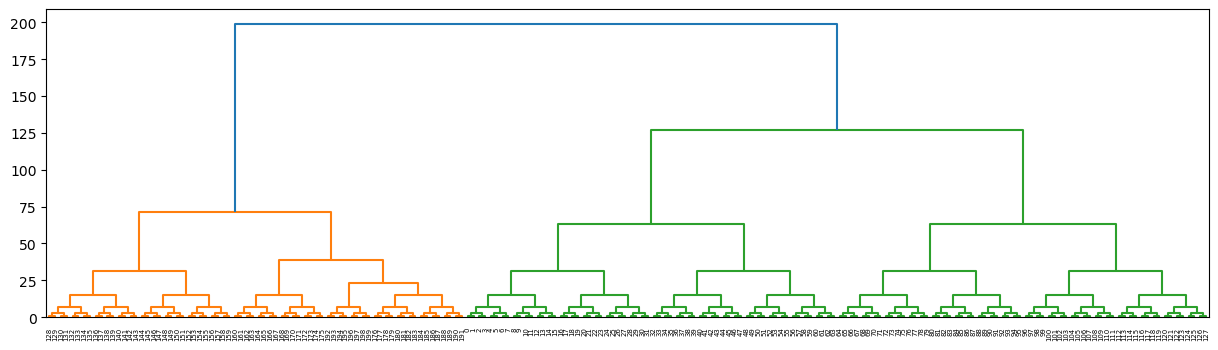

method :  complete | metric =  chebyshev | num_features =  2


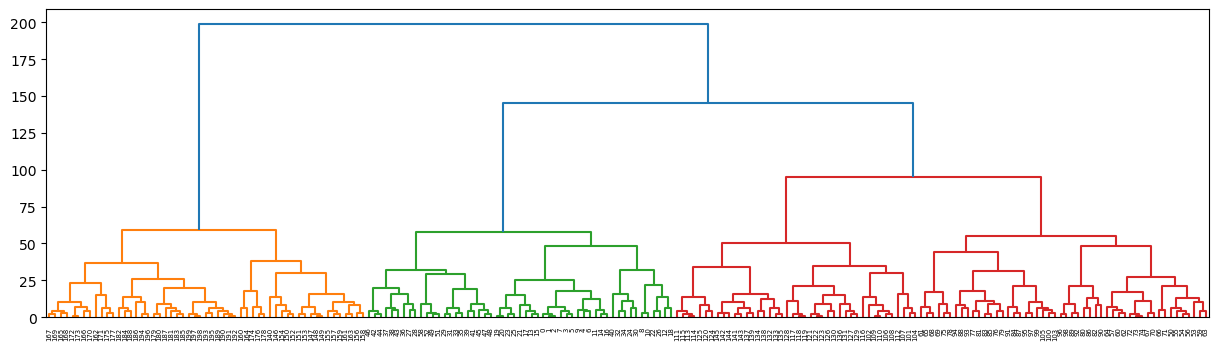

In [68]:
# performinc hc on gene dataset by varying method, metric and num_features
loc = './SMAI-Dataset-hc-dataset/new_customers.csv'
df = pd.read_csv(loc)
gender_mapping = {'Male': 0, 'Female': 1}
df['Genre'] = df['Genre'].map(gender_mapping)
total_features = df.shape[1]

for i in range(0,3):
    for j in range(0,3):
        for k in range(0,4):
            method = linkage_methods[i]
            metric = distance_metrics[j]
            if(method=='ward' and metric!='euclidean'):
                continue
            num_features = total_features-k
            # removing k features from the end
            new_df = df.iloc[:, :k]
            hc_gene = HierarchicalClustering(new_df)
            lm_gene = hc_gene.linkages(new_df,method,metric)
            print('method : ',method,'| metric = ',metric,'| num_features = ',num_features)
            hc_gene.plot_dendrogram(lm_gene)

    

Hierarchy of Clusters:

    - The vertical axis of the dendrogram represents the level of similarity or dissimilarity between data points or clusters.
    - At the bottom of the dendrogram, individual data points are represented as leaves.
    - As you move up the dendrogram, branches and nodes represent clusters formed by merging data points or smaller clusters.



Cluster Fusion:

    - The height at which branches merge in the dendrogram corresponds to the level of similarity or dissimilarity at which the fusion (merging) of clusters occurred.
    - Lower fusion points indicate that the clusters were similar, while higher fusion points indicate that the clusters were dissimilar.

Cluster Distances:

    - The horizontal lines in the dendrogram represent the distances between clusters or data points.
    - Longer horizontal lines indicate larger distances or dissimilarity.
    - Shorter horizontal lines indicate smaller distances or similarity.


Observations

    - As number of clusters decrease, the clustering becomes better and more clusters are formed
    - For all features (5), only 1 cluster is formed


In [64]:
# performinc hc on gene dataset
loc = './SMAI-Dataset-gene-expression/gene.csv'
df = pd.read_csv(loc)


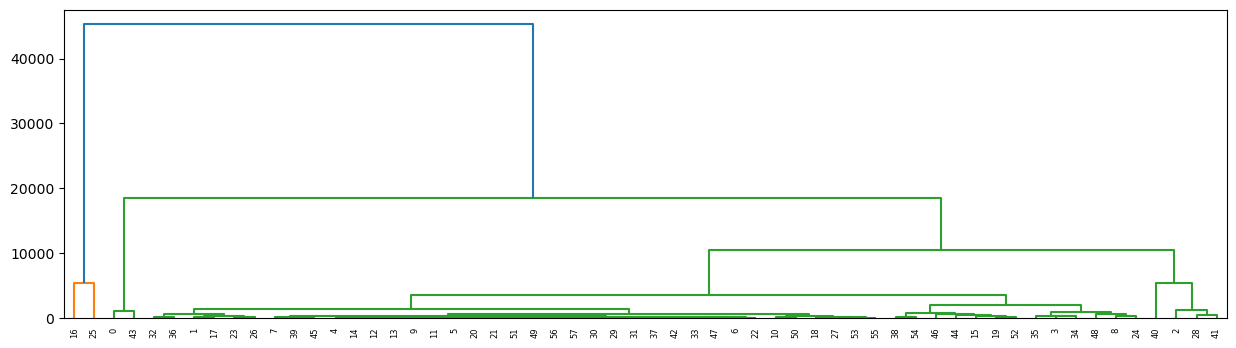

In [65]:
method = 'complete'
metric = 'euclidean'
hc_gene = HierarchicalClustering(df)
lm_gene = hc_gene.linkages(df,method,metric)
# print('linkage matrix : ',lm_gene)
hc_gene.plot_dendrogram(lm_gene)

method :  ward | metric =  euclidean | num_features =  13


/home/tejas/anaconda3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:2843: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


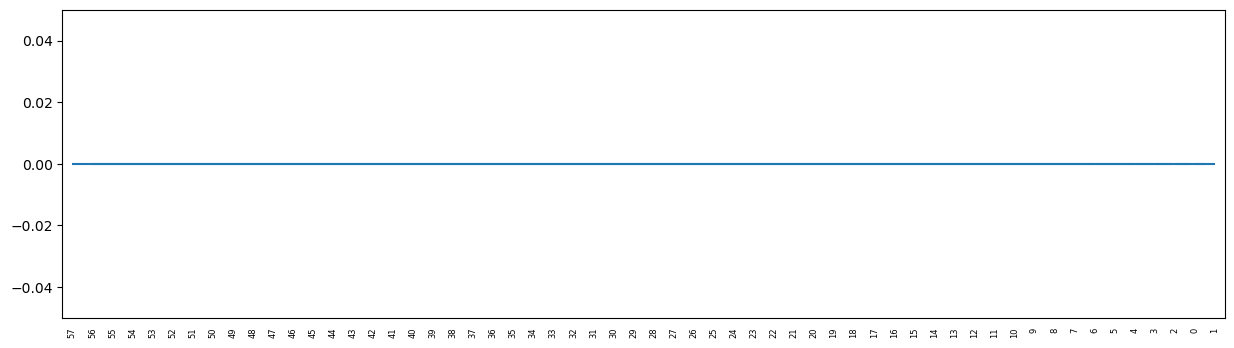

method :  ward | metric =  euclidean | num_features =  12


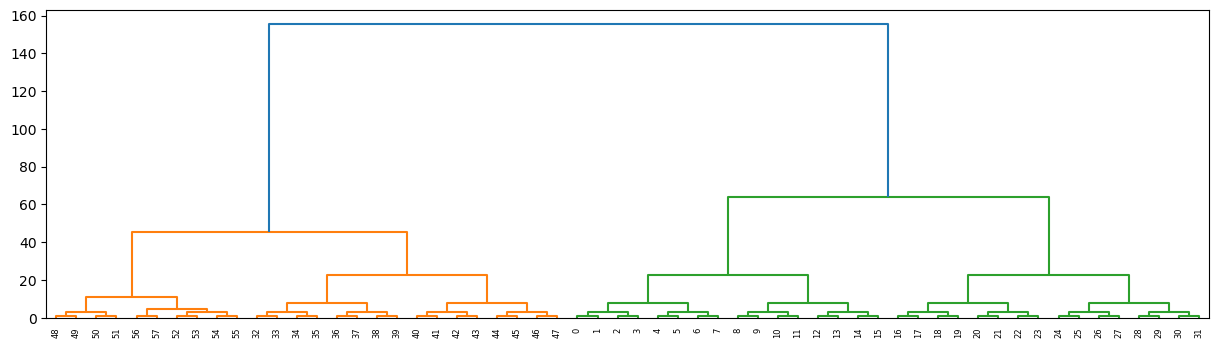

method :  ward | metric =  euclidean | num_features =  11


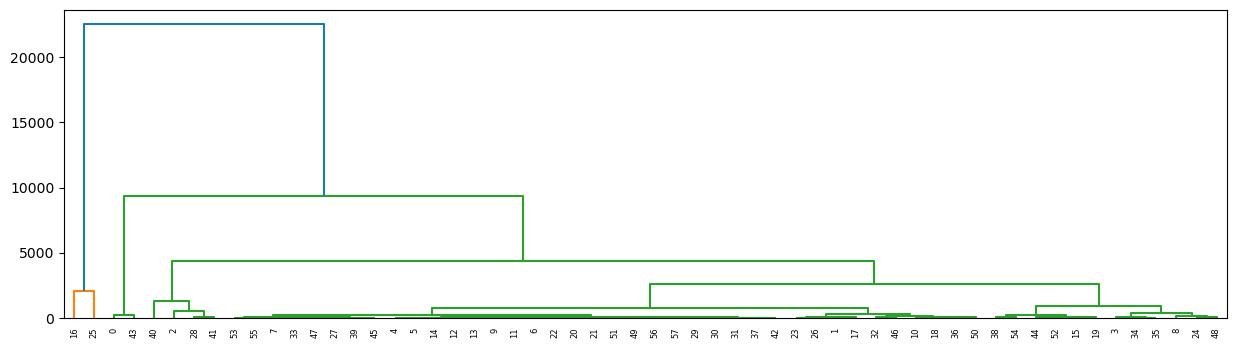

method :  ward | metric =  euclidean | num_features =  10


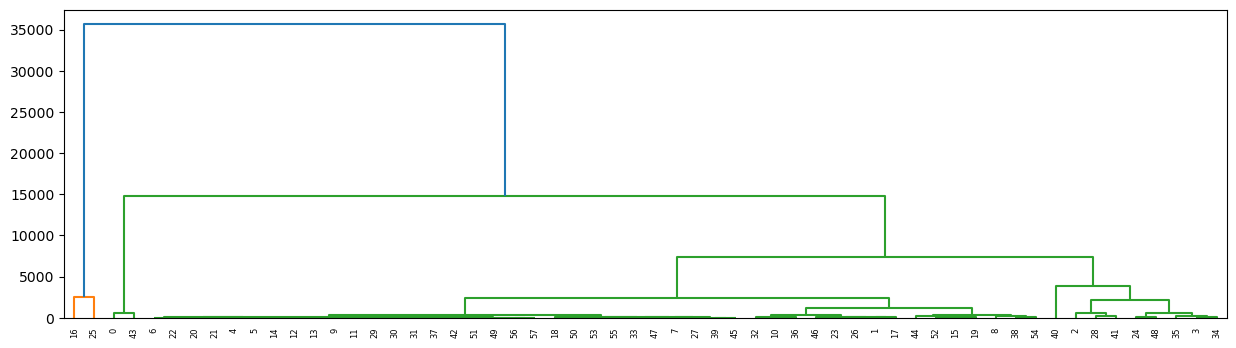

method :  single | metric =  euclidean | num_features =  13


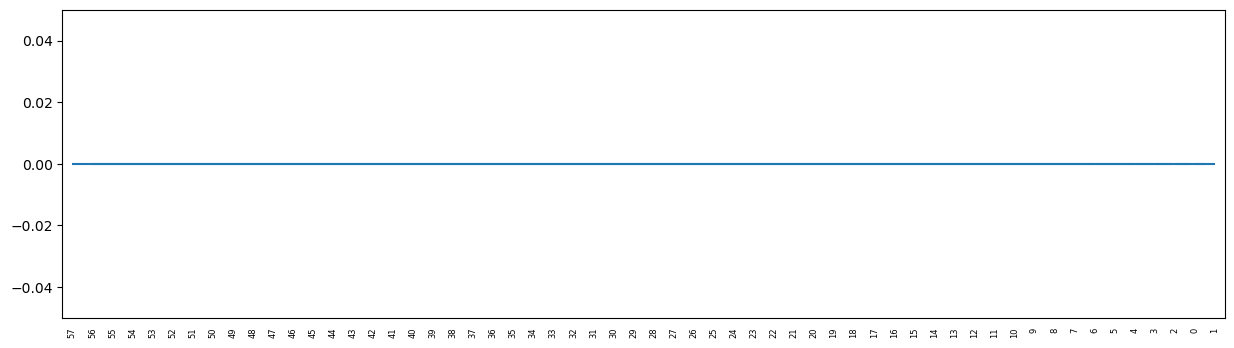

method :  single | metric =  euclidean | num_features =  12


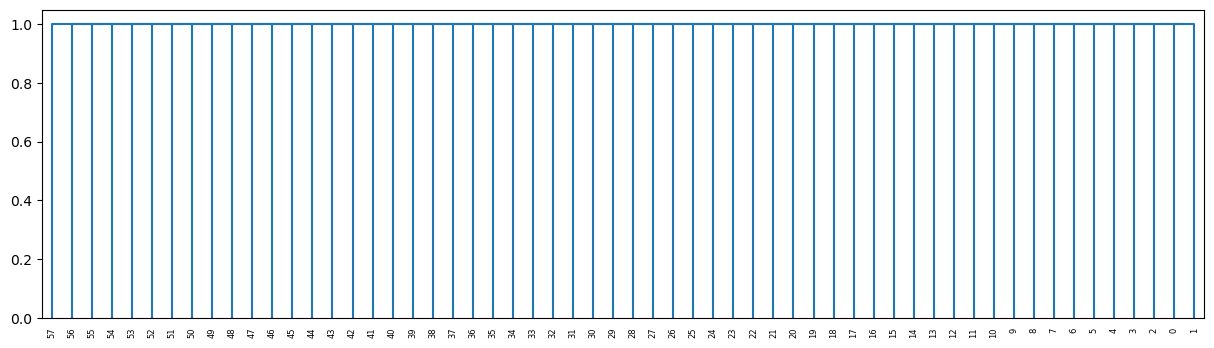

method :  single | metric =  euclidean | num_features =  11


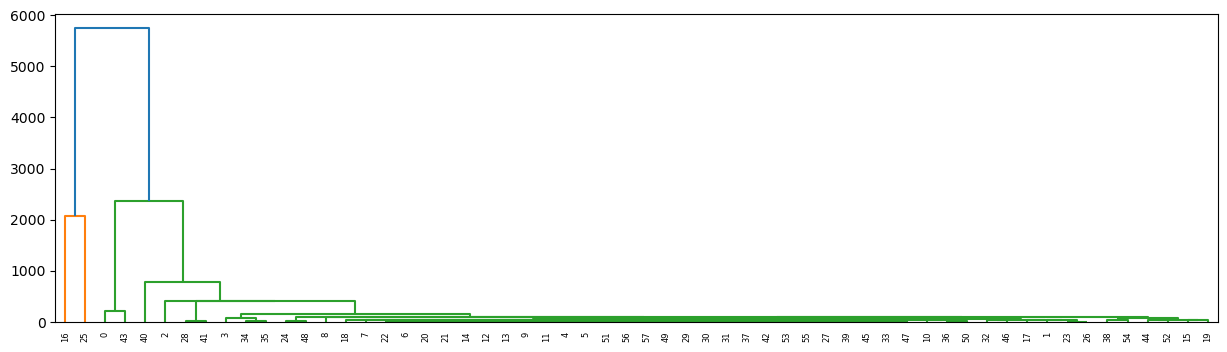

method :  single | metric =  euclidean | num_features =  10


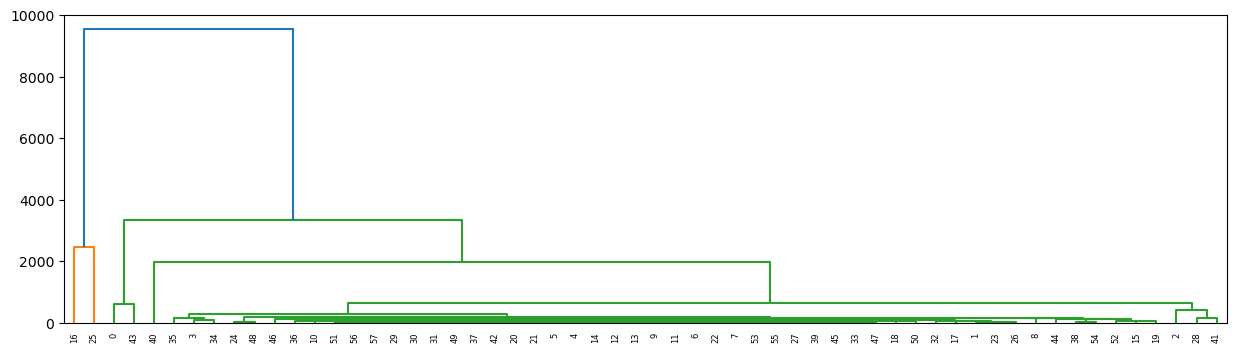

method :  single | metric =  cityblock | num_features =  13


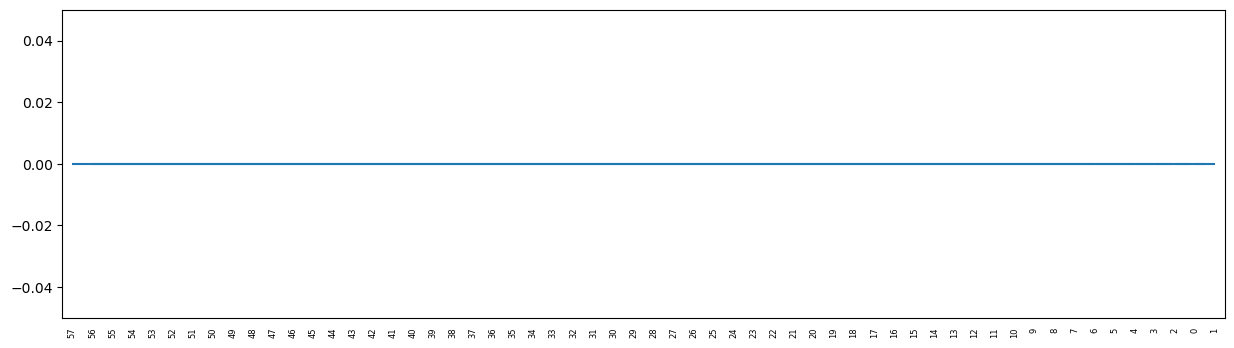

method :  single | metric =  cityblock | num_features =  12


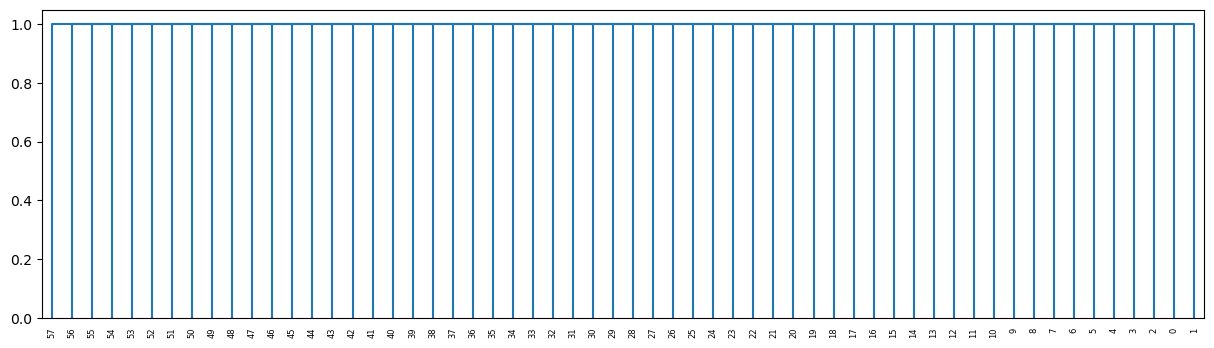

method :  single | metric =  cityblock | num_features =  11


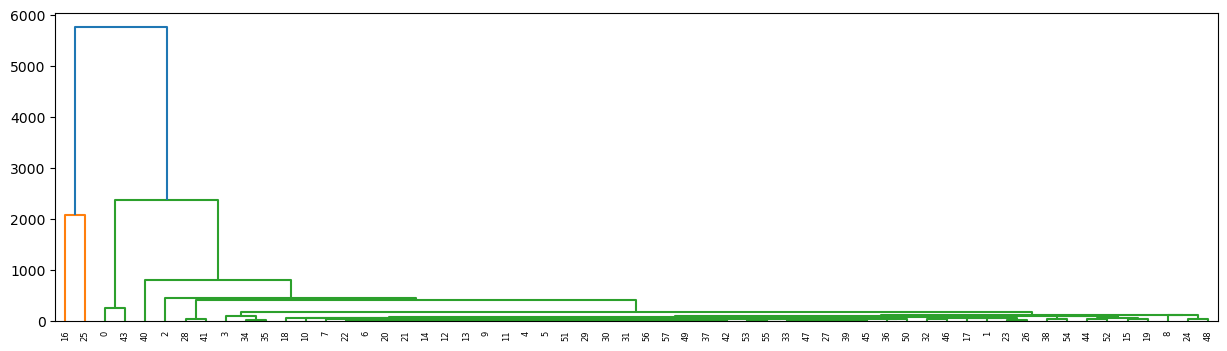

method :  single | metric =  cityblock | num_features =  10


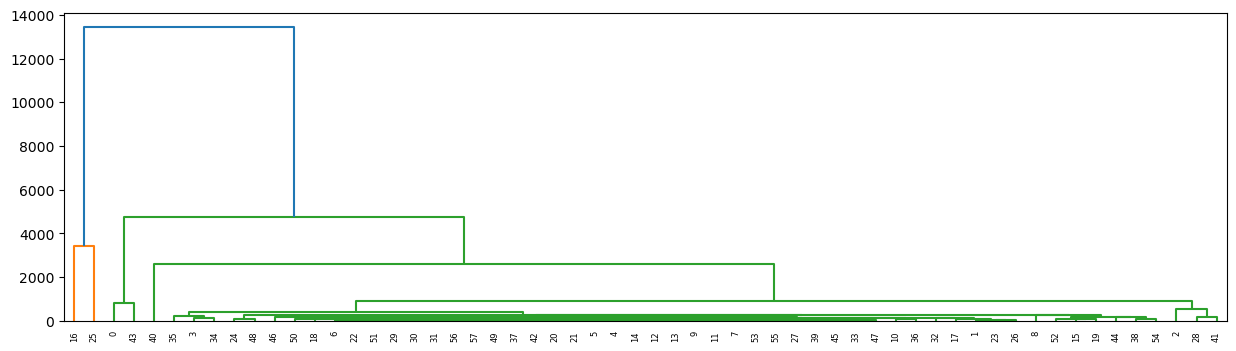

method :  single | metric =  chebyshev | num_features =  13


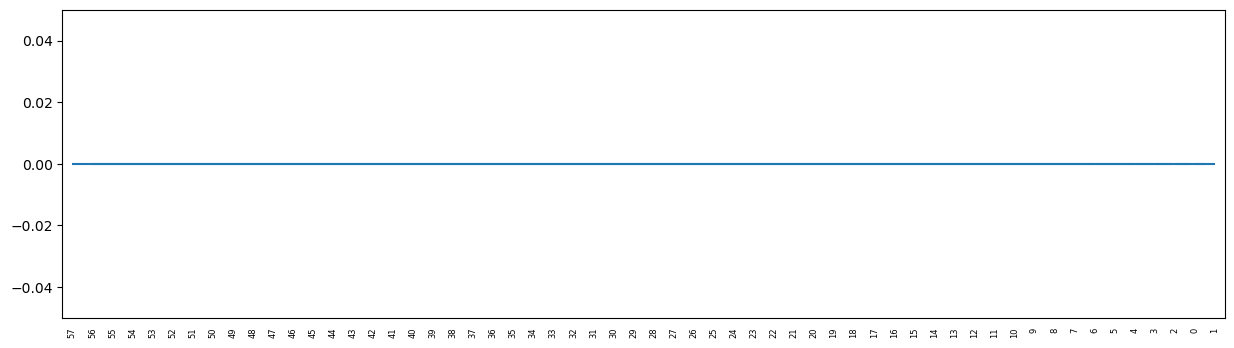

method :  single | metric =  chebyshev | num_features =  12


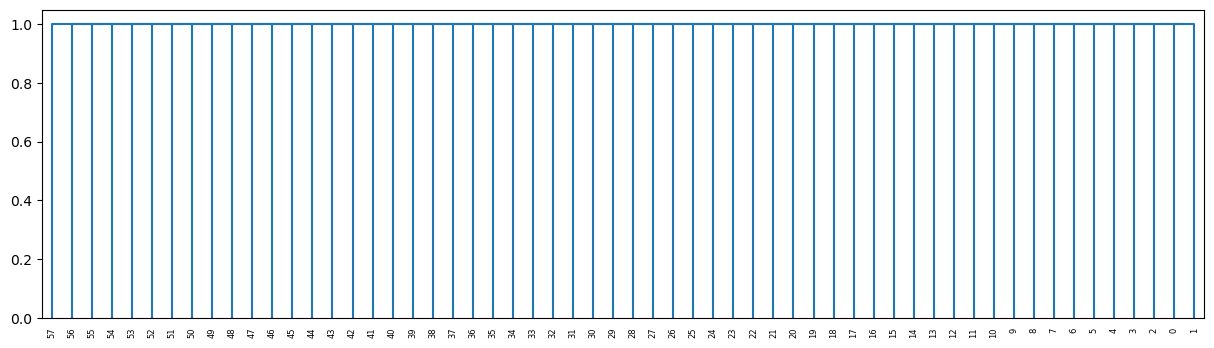

method :  single | metric =  chebyshev | num_features =  11


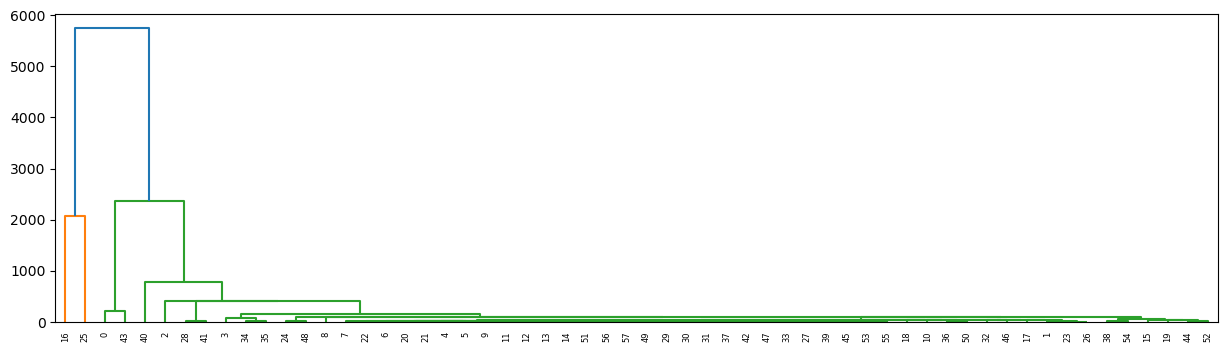

method :  single | metric =  chebyshev | num_features =  10


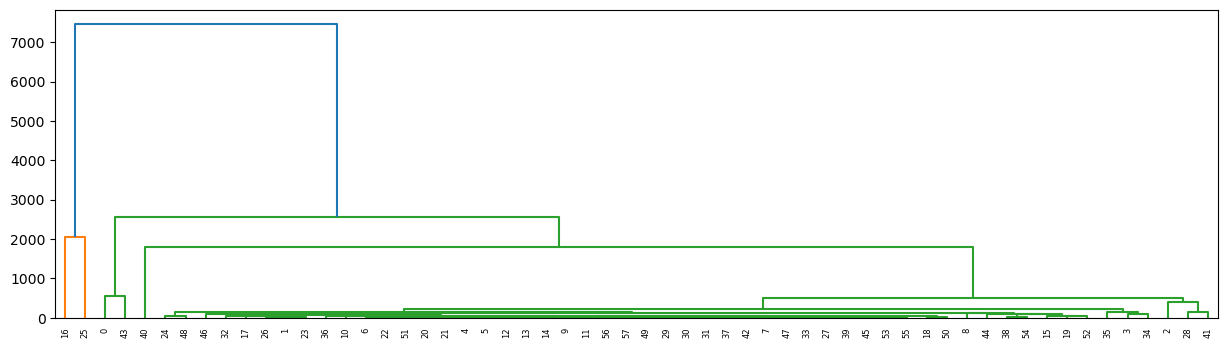

method :  complete | metric =  euclidean | num_features =  13


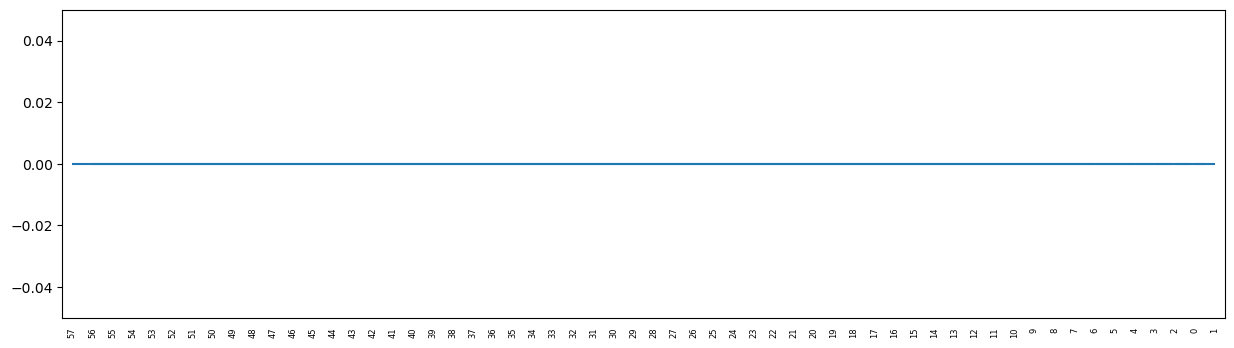

method :  complete | metric =  euclidean | num_features =  12


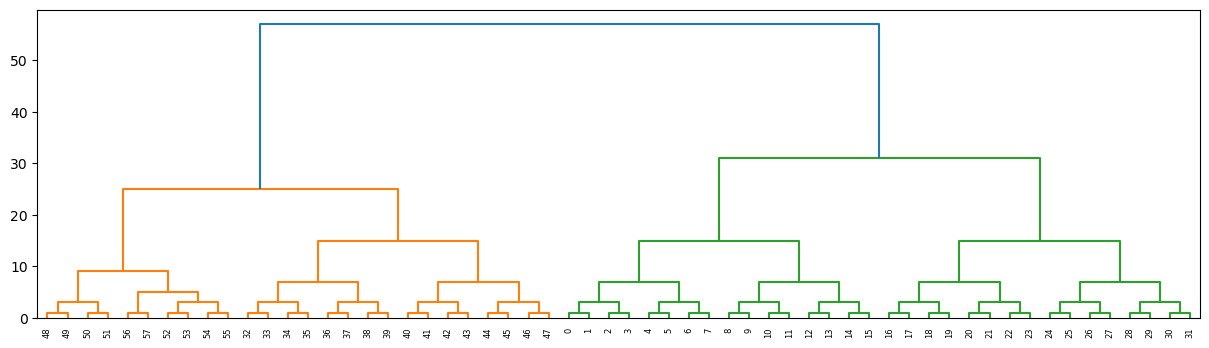

method :  complete | metric =  euclidean | num_features =  11


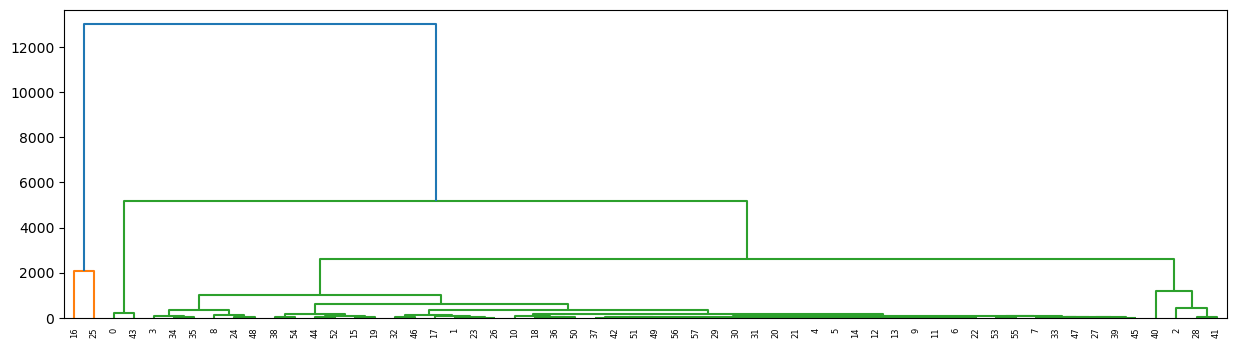

method :  complete | metric =  euclidean | num_features =  10


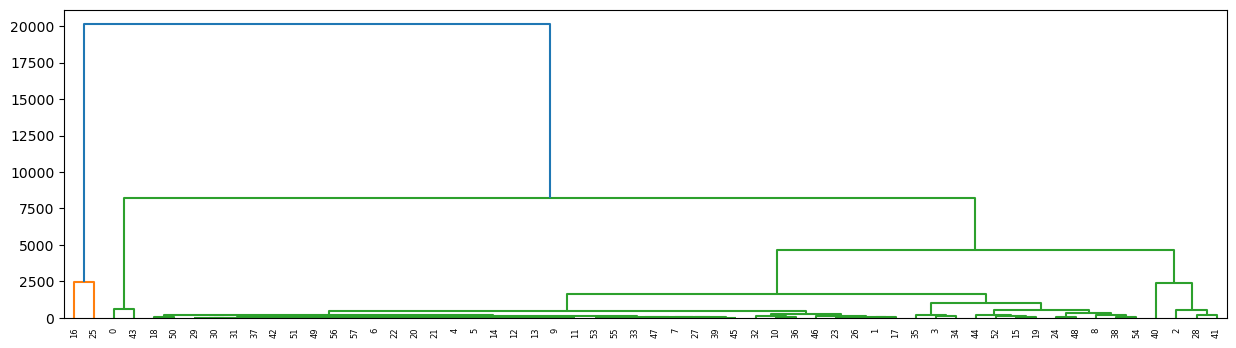

method :  complete | metric =  cityblock | num_features =  13


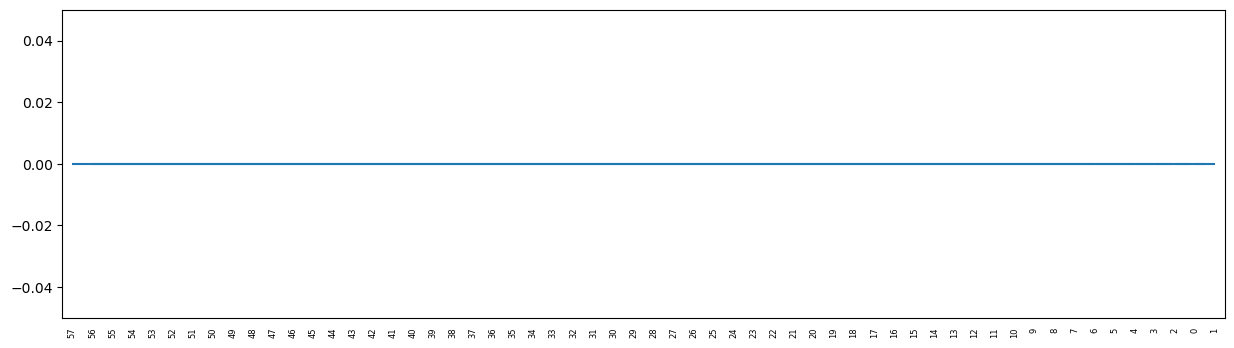

method :  complete | metric =  cityblock | num_features =  12


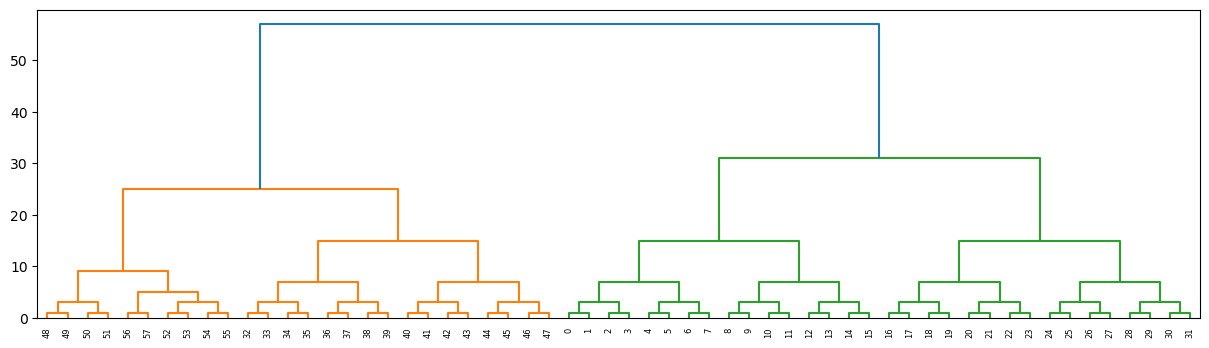

method :  complete | metric =  cityblock | num_features =  11


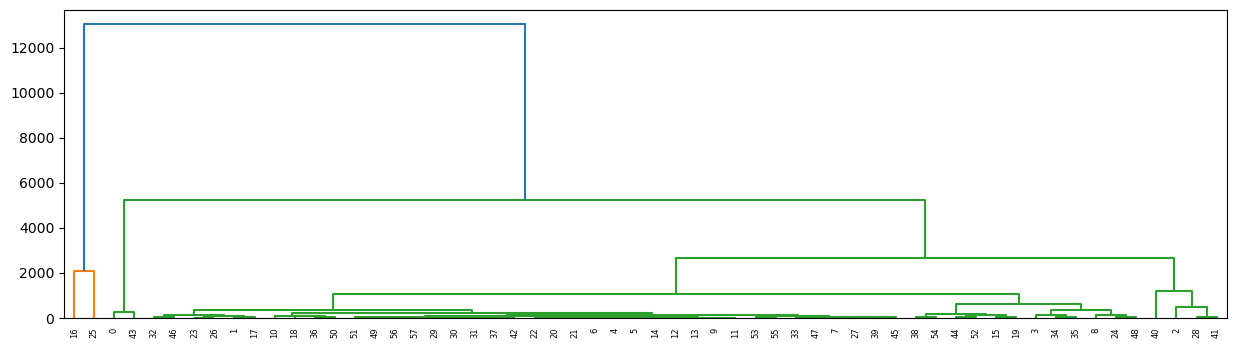

method :  complete | metric =  cityblock | num_features =  10


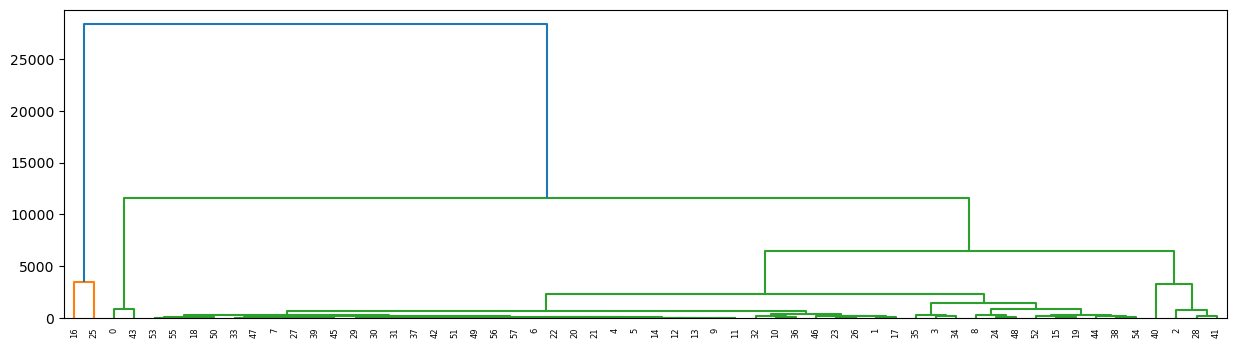

method :  complete | metric =  chebyshev | num_features =  13


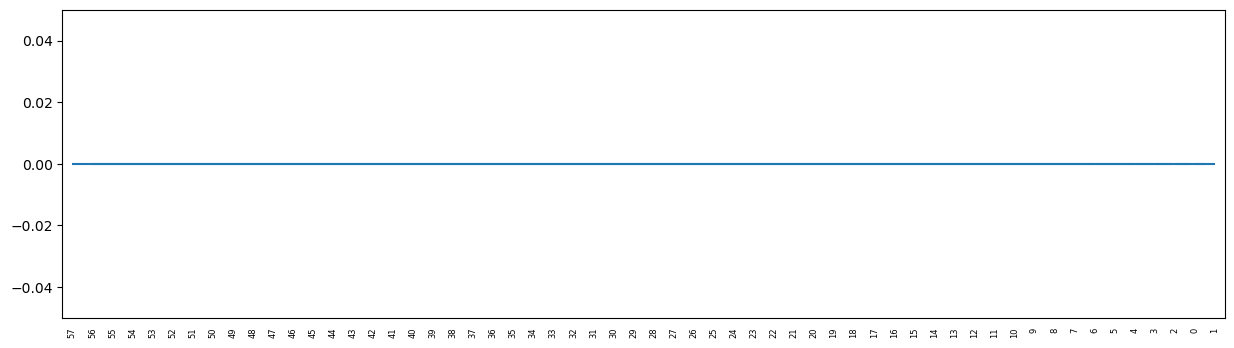

method :  complete | metric =  chebyshev | num_features =  12


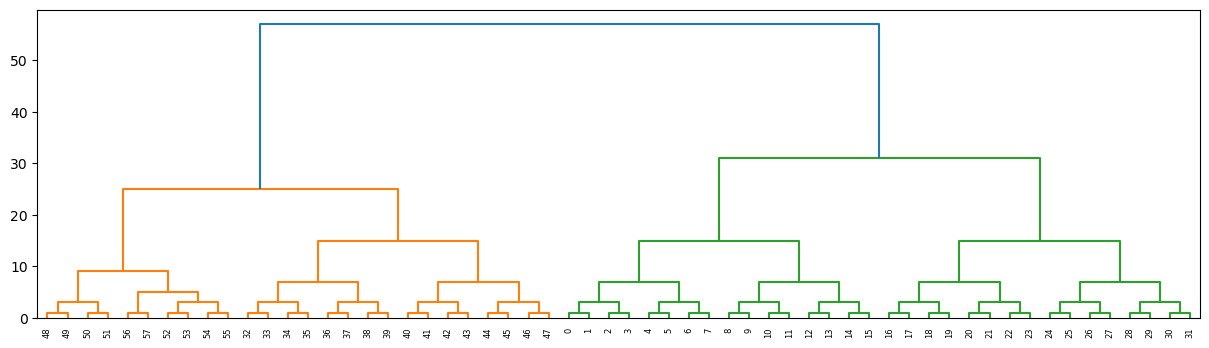

method :  complete | metric =  chebyshev | num_features =  11


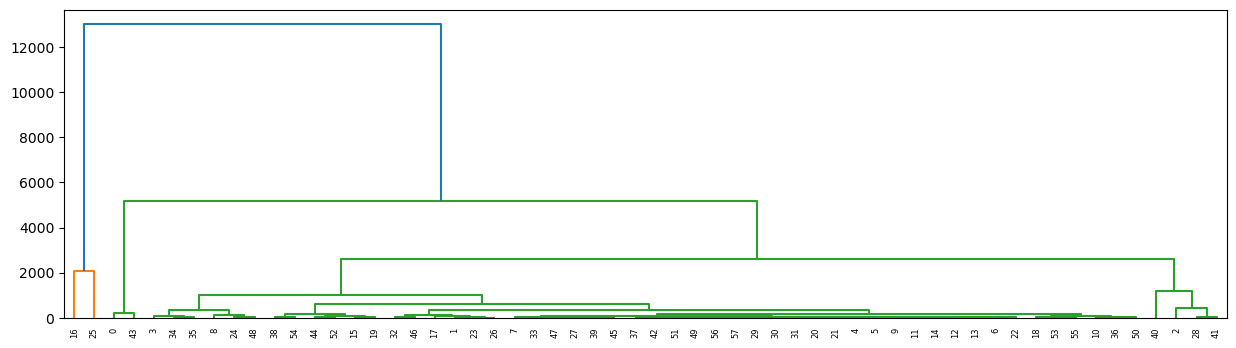

method :  complete | metric =  chebyshev | num_features =  10


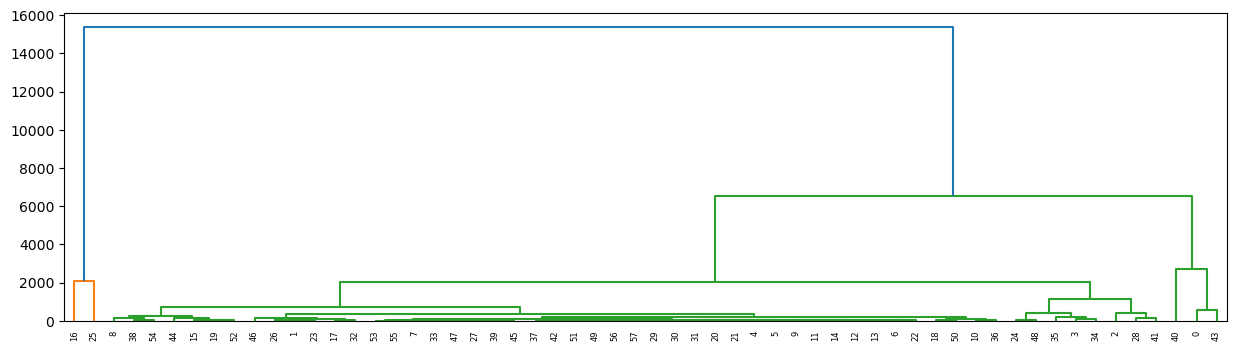

In [66]:
# performinc hc on gene dataset
loc = './SMAI-Dataset-gene-expression/gene.csv'
df = pd.read_csv(loc)
total_features = df.shape[1]

for i in range(0,3):
    for j in range(0,3):
        for k in range(0,4):
            method = linkage_methods[i]
            metric = distance_metrics[j]
            if(method=='ward' and metric!='euclidean'):
                continue
            num_features = total_features-k
            new_df = df.iloc[:, :k]
            hc_gene = HierarchicalClustering(new_df)
            lm_gene = hc_gene.linkages(new_df,method,metric)
            print('method : ',method,'| metric = ',metric,'| num_features = ',num_features)
            hc_gene.plot_dendrogram(lm_gene)

    

Hierarchy of Clusters:

    - The vertical axis of the dendrogram represents the level of similarity or dissimilarity between data points or clusters.
    - At the bottom of the dendrogram, individual data points are represented as leaves.
    - As you move up the dendrogram, branches and nodes represent clusters formed by merging data points or smaller clusters.



Cluster Fusion:

    - The height at which branches merge in the dendrogram corresponds to the level of similarity or dissimilarity at which the fusion (merging) of clusters occurred.
    - Lower fusion points indicate that the clusters were similar, while higher fusion points indicate that the clusters were dissimilar.

Cluster Distances:

    - The horizontal lines in the dendrogram represent the distances between clusters or data points.
    - Longer horizontal lines indicate larger distances or dissimilarity.
    - Shorter horizontal lines indicate smaller distances or similarity.


Observations

    - As number of clusters decrease, the clustering becomes better and more clusters are formed
    - For all features (13), only 1 cluster is formed
